# Import libraries

In [1]:
import PIL
import cv2 as cv
import numpy as np
import io
import base64
import requests
import json

from multiprocess import Pool
from multiprocess import cpu_count

# Testing requests

In [13]:
def req(n):
    import requests
    
    data = None

    with open("test_input.txt", "r") as f:
        data = f.read()

    data = data.split("\n")

    images = []
    for i in range(0, 919, 9):
        images.append(data[i:i+9])
    
    s = "\n".join(images[n])
    
    url = "http://127.0.0.1:5000/pred"
    response = requests.post(url, json=s)

    print("Код ответа:", response.status_code) # 200 - успешно
    response = response.text
    
    return [n, response]

def preprocess_input_model(_image): 
    _image = _image.replace("data:image/jpeg;base64,", "")
    _image = PIL.Image.open(io.BytesIO(base64.b64decode(_image)))
    
    crop_image = _image.crop((20, 30, 110, 90))
    crop_image = crop_image.resize((128, 128), PIL.Image.ANTIALIAS)
    
    crop_image = cv.cvtColor(np.array(crop_image), cv.COLOR_BGRA2BGR)
    
    return crop_image

In [9]:
data = None

with open("Input.txt", "r") as f:
    data = f.read()

data = data.split("\n")

images = []
for i in range(0, 919, 9):
    images.append(data[i:i+9])

In [32]:
pool = Pool(cpu_count() * 2)
result = []
test = 100

result.append(pool.map(req, range(0, test)))
result

[[[0,
   '"0~boat\\n1~boat\\n2~boat\\n3~boat\\n4~bicycle\\n5~airplane\\n6~car\\n7~train\\n8~train\\n"\n'],
  [1,
   '"0~truck\\n1~airplane\\n2~boat\\n3~car\\n4~boat\\n5~boat\\n6~boat\\n7~boat\\n8~truck\\n"\n'],
  [2,
   '"0~airplane\\n1~bicycle\\n2~airplane\\n3~airplane\\n4~truck\\n5~train\\n6~bus\\n7~airplane\\n8~motorcycle\\n"\n'],
  [3,
   '"0~train\\n1~airplane\\n2~truck\\n3~bus\\n4~truck\\n5~train\\n6~bus\\n7~truck\\n8~bus\\n"\n'],
  [4,
   '"0~bus\\n1~airplane\\n2~motorcycle\\n3~airplane\\n4~boat\\n5~airplane\\n6~truck\\n7~airplane\\n8~boat\\n"\n'],
  [5,
   '"0~motorcycle\\n1~motorcycle\\n2~bus\\n3~motorcycle\\n4~bus\\n5~motorcycle\\n6~car\\n7~motorcycle\\n8~motorcycle\\n"\n'],
  [6,
   '"0~truck\\n1~bus\\n2~bicycle\\n3~bicycle\\n4~bicycle\\n5~car\\n6~car\\n7~truck\\n8~motorcycle\\n"\n'],
  [7,
   '"0~truck\\n1~bicycle\\n2~bicycle\\n3~motorcycle\\n4~bus\\n5~bicycle\\n6~bicycle\\n7~bicycle\\n8~truck\\n"\n'],
  [8,
   '"0~truck\\n1~airplane\\n2~truck\\n3~bus\\n4~train\\n5~truck\\n

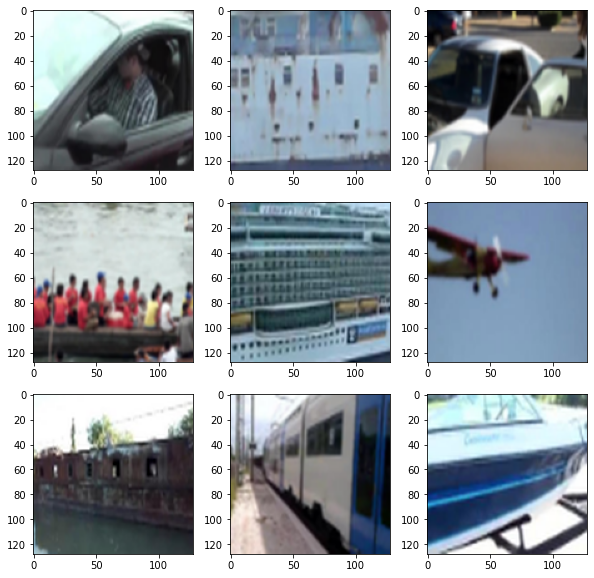

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(0, 9):
    img = preprocess_input_model(images[63][i])
    plt.subplot(3, 3, i+1)
    plt.imshow(img)
    
plt.show()